# 1: Introduction to Seaborn

So far, we've mostly worked with plots that are quick to analyze and make sense of. Line charts, scatter plots, and bar plots allow us to convey a few nuggets of insights to the reader. We've also explored how we can combine those plots in interesting ways to convey deeper insights and continue to extend the storytelling power of data visualization. In this mission, we'll explore how to quickly create multiple plots that are subsetted using one or more conditions.

We'll be working with the seaborn visualization library, which is built on top of matplotlib. Seaborn has good support for more complex plots, attractive default styles, and integrates well with the pandas library. Here are some examples of some complex plots that can be created using seaborn:

<img src="seaborn_gallery.png">

Before we dive into seaborn, let's understand the data set we'll be working with in this mission.

# 2: Introduction to the Data Set

We'll be working with a data set of the passengers of the Titanic. The Titanic shipwreck is the most famous shipwreck in history and led to the creation of better safety regulations for ships. One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.

The data set was compiled by Kaggle for their introductory data science competition, called Titanic: Machine Learning from Disaster. The goal of the competition is to build machine learning models that can predict if a passenger survives from their attributes. You can download the data set by navigating to the data download page for the competition and creating a free account.

The data for the passengers is contained in two files:

    train.csv: Contains data on 712 passengers
    test.csv: Contains data on 418 passengers

Each row in both data sets represents a passenger on the Titanic, and some information about them. We'll be working with the train.csv file, because the Survived column, which describes if a given passenger survived the crash, is preserved in the file. The column was removed in test.csv, to encourage competitors to practice making predictions using the data. Here are descriptions for each of the columns in train.csv:

    PassengerId -- A numerical id assigned to each passenger.
    Survived -- Whether the passenger survived (1), or didn't (0).
    Pclass -- The class the passenger was in.
    Name -- the name of the passenger.
    Sex -- The gender of the passenger -- male or female.
    Age -- The age of the passenger. Fractional.
    SibSp -- The number of siblings and spouses the passenger had on board.
    Parch -- The number of parents and children the passenger had on board.
    Ticket -- The ticket number of the passenger.
    Fare -- How much the passenger paid for the ticker.
    Cabin -- Which cabin the passenger was in.
    Embarked -- Where the passenger boarded the Titanic.

Here's what the first few rows look like:
    
    PassengerId 	Survived 	Pclass 	Name 	Sex 	Age 	SibSp 	Parch 	Ticket 	Fare 	Cabin 	Embarked
    1 	0 	3 	Braund, Mr. Owen Harris 	male 	22.0 	1 	0 	A/5 21171 	7.2500 		S
    2 	1 	1 	Cumings, Mrs. John Bradley (Florence Briggs Thayer) 	female 	38.0 	1 	0 	PC 17599 	71.2833 	C85 	C
    3 	1 	3 	Heikkinen, Miss. Laina 	female 	26.0 	0 	0 	STON/O2. 3101282 	7.9250 		S

Let's remove columns like Name and Ticket that we don't have a way to visualize. In addition, we need to remove any rows containing missing values, as seaborn will throw errors when we try to plot missing values.

# Instructions

    Read train.csv into a DataFrame named titanic. Keep only the following columns:
        "Survived"
        "Pclass"
        "Sex"
        "Age"
        "SibSp"
        "Parch"
        "Fare"
        "Embarked"

    Use the DataFrame.dropna() method to remove rows containing missing values.


In [3]:
import pandas as pd

data = pd.read_csv( "../data/train.csv" )
titanic = data[ ["Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked" ] ]
titanic = titanic.dropna()

# 3: Creating Histograms In Seaborn

Seaborn works similarly to the pyplot module from matplotlib. We primarily use seaborn interactively, by calling functions in its top level namespace. Like the pyplot module from matplotlib, seaborn creates a matplotlib figure or adds to the current, existing figure each time we generate a plot. When we're ready to display the plots, we call pyplot.show().

To get familiar with seaborn, we'll start by creating the familiar histogram. We can generate a histogram of the Fare column using the seaborn.distplot() function:

    seaborn is commonly imported as `sns`.

    import seaborn as sns

    sns.distplot(titanic["Fare"])

    plt.show()
    
Here's the plot that's generated when the above code is run:

<img src="seaborn_histogram_with_kde.png">

Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it. In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram. If you're interested in learning about how KDE works, you can read more on Wikipedia.

What you need to know for now is that the resulting line is a smoother version of the histogram, called a kernel density plot. Kernel density plots are especially helpful when we're comparing distributions, which we'll explore later in this mission. When viewing a histogram, our visual processing systems influence us to smooth out the bars into a continuous line.

## Instructions

    Import seaborn as sns and matplotlib.pyplot as plt.
    Use the seaborn.distplot() function to visualize the distribution of the "Age" column.
    Display the plot using pyplot.show().

 Need a hint?

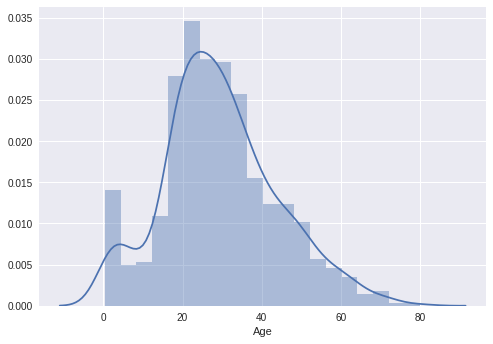

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot( titanic["Age"] )
plt.show()

# 4: Generating A Kernel Density Plot

While having both the histogram and the kernel density plot is useful when we want to explore the data, it can be overwhelming for someone who's trying to understand the distribution. To generate just the kernel density plot, we use the seaborn.kdeplot() function:

    sns.kdeplot(titanic["Fare"])

Here's what just the kernel density plot looks like:

    <img src="seaborn_kdeplot.png">

While the distribution of data is displayed in a smoother fashion, it's now more difficult to visually estimate the area under the curve using just the line chart. When we also had the histogram, the bars provided a way to understand and compare proportions visually.

To bring back some of the ability to easily compare proportions, we can shade the area under the line using a single color. When calling the seaborn.kdeplot() function, we can shade the area under the line by setting the shade parameter to True.

## Instructions

    Generate a kernel density plot:
        Using the values in the "Age" column
        With the area under the curve shaded
    Set the x-axis label to "Age" using pyplot.xlabel().


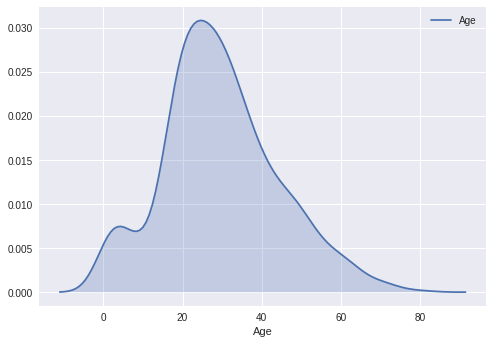

In [5]:
sns.kdeplot( titanic["Age"], shade=True )
plt.xlabel( "Age" )
plt.show()

# 5: Modifying The Appearance Of The Plots

From the plots in the previous step, you'll notice that seaborn:

    Sets the x-axis label automatically based on the column name we passed in
    Sets the background color to a light gray color
    Hides the x-axis and y-axis ticks
    Displays the coordinate grid

In the last few missions, we explored some general aesthetics guidelines for plots. The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines. We can use the seaborn.set_style() function to change the default seaborn style sheet. Seaborn comes with a few style sheets:

    darkgrid: Coordinate grid displayed, dark background color
    whitegrid: Coordinate grid displayed, white background color
    dark: Coordinate grid hidden, dark background color
    white: Coordinate grid hidden, white background color
    ticks: Coordinate grid hidden, white background color, ticks visible

Here's a diagram that compares the same plot across all styles:

<img src="seaborn_all_styles.png">

By default, the seaborn style is set to "darkgrid":

    sns.set_style("darkgrid")

If we change the style sheet using this method, all future plots will match that style in your current session. This means you need to set the style before generating the plot.

To remove the axis spines for the top and right axes, we use the seaborn.despine() function:

    sns.despine()

By default, only the top and right axes will be despined, or have their spines removed. To despine the other two axes, we need to set the left and bottom parameters to True.


## Instructions

    Set the style to the style sheet that hides the coordinate grid and sets the background color to white.
    Generate a kernel density plot of the "Age" column, with the area under the curve shaded.
    Set the x-axis label to "Age".
    Despine all of the axes.


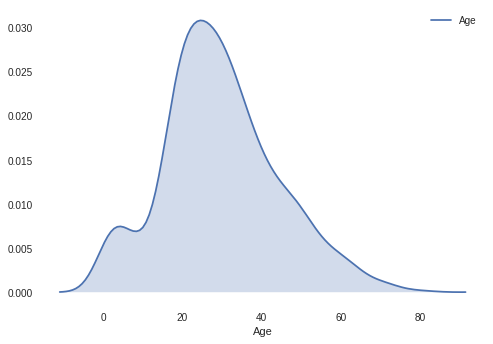

In [6]:
sns.set_style( "white" )
sns.kdeplot( titanic["Age"], shade=True )
sns.despine( left=True, bottom=True )
plt.xlabel( "Age" )
plt.show()

# 6: Conditional Distributions Using A Single Condition

In the last few missions, we created a small multiple, which is a group of plots that have the same axis scales so the viewer can compare plots effectively. We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.

In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want. For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots. One kernel density plot would visualize the distribution of values in the "Age" column where Survived equalled 0 and the other would visualize the distribution of values in the "Age" column where Survived equalled 1.

Here's what those plots look like:

<img src="seaborn_simple_conditional.png">

The code to generate the pair of plots, is short and sweet:

Condition on unique values of the "Survived" column.

    g = sns.FacetGrid(titanic, col="Survived", size=6)

For each subset of values, generate a kernel density plot of the "Age" columns.
    
    g.map(sns.kdeplot, "Age", shade=True)

Seaborn handled:

    subsetting the data into rows where Survived is 0 and where Survived is 1
    creating both Axes objects, ensuring the same axis scales
    plotting both kernel density plots

Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values. The seaborn.FacetGrid object is used to represent the layout of the plots in the grid and the columns used for subsetting the data. The word "facet" from FacetGrid is another word for "subset". Setting the col parameter to "Survived" specifies a separate plot for each unique value in the Survived column. Setting the size parameter to 6 specifies a height of 6 inches for each plot.

Once we've created the grid, we use the FacetGrid.map() method to specify the plot we want for each unique value of Survived. Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.

The function that's passed into FacetGrid.map() has to be a valid matplotlib or seaborn function. For example, we can map matplotlib histograms to the grid:

    g = sns.FacetGrid(titanic, col="Survived", size=6)

    g.map(plt.hist, "Age")

Let's create a grid of plots that displays the age distributions for each class.

## Instructions

    Use a FacetGrid instance to generate three plots on the same row:
        One for each unique value of Pclass.
        Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
        Each plot should have a height of 6 inches.
    Remove all of the spines using seaborn.despine().
    Display the plots.




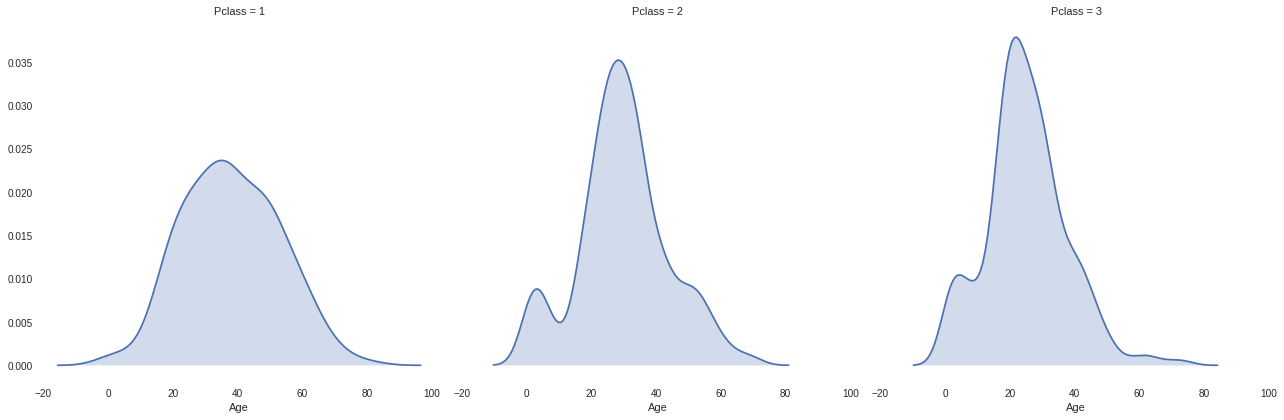

In [7]:
# Condition on unique values of the "Pclass" column.
g = sns.FacetGrid(titanic, col="Pclass", size=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
sns.despine( left=True, bottom=True )
plt.show()

# 7: Creating Conditional Plots Using Two Conditions

We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition. When creating a FacetGrid, we use the row parameter to specify the column in the dataframe we want used to subset across the rows in the grid. The best way to understand this is to see a working example.

The starter code subsets the dataframe on different combinations of unique values in both the Pclass and Survived columns. Try changing the conditions to see the resulting plots.


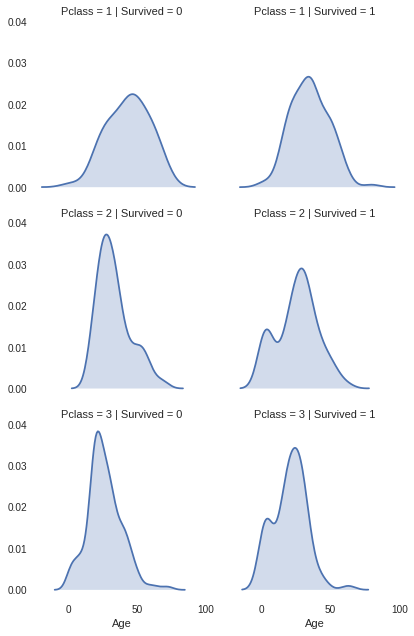

In [8]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

# 8: Creating Conditional Plots Using Three Conditions

When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another. We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently. Thankfully, we can add a condition just by setting the hue parameter to the column name from the dataframe.

Let's add a new condition to the grid of plots we generated in the last step and see what this grid of plots would look like.

## Instructions

    Use a FacetGrid instance to generate a grid of plots using the following conditions:
        The Survived column across the columns in the grid.
        The Pclass column across the rows in the grid.
        The Sex column using different hues.
    Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
    Each plot should have a height of 3 inches.
    Remove all of the spines using seaborn.despine().
    Display the plots.

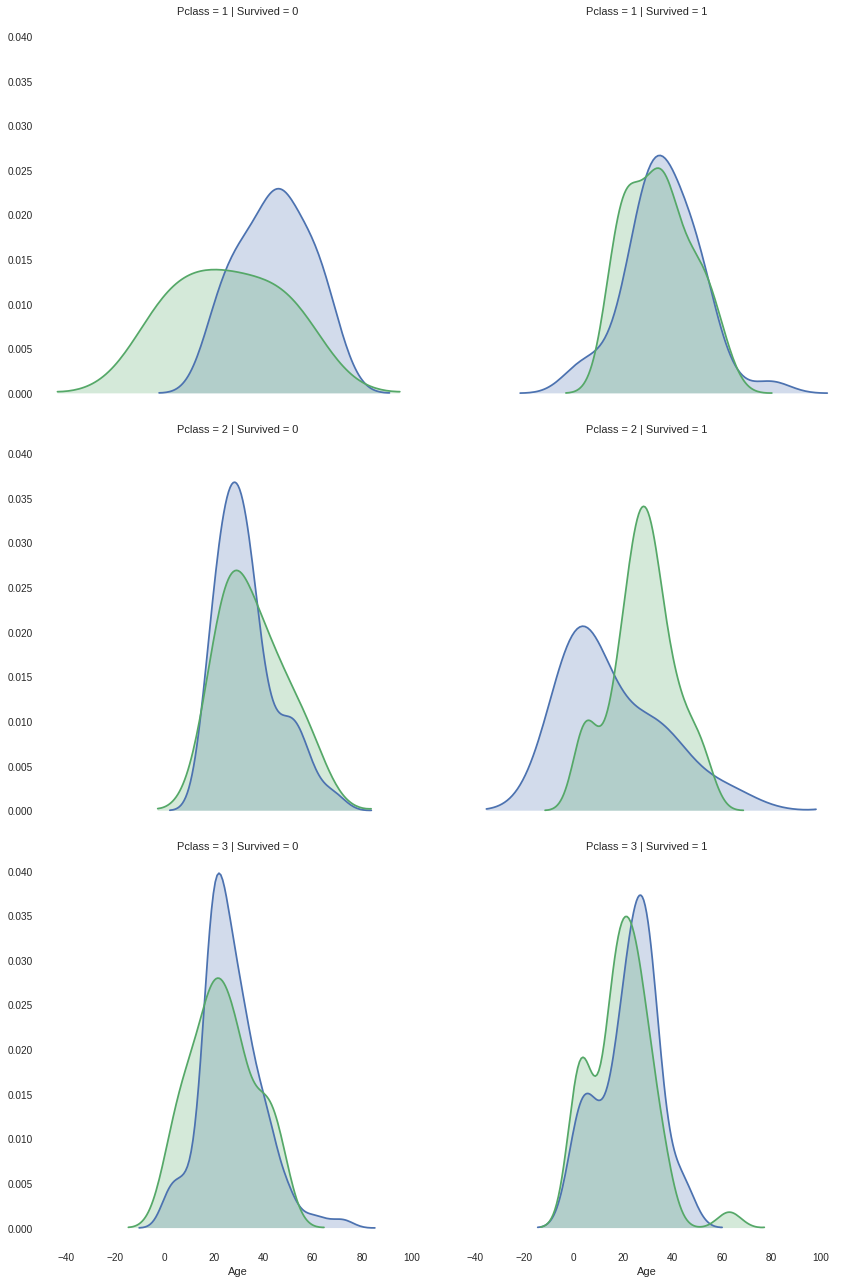

In [9]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=6)
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True, bottom=True)
plt.show()

# 9: Adding A Legend

Now that we're coloring plots, we need a legend to keep track of which value each color represents. As a challenge to you, we won't specify how exactly to generate a legend in seaborn. Instead, we encourage you to use the examples from the page on plotting using the FacetGrid instance.

Here's what we want the final grid to look like:

<img src="seaborn_three_conditions.png">

## Instructions

    Use a FacetGrid instance to generate a grid of plots using the following conditions:
        The Survived column across the columns in the grid.
        The Pclass column across the rows in the grid.
        The Sex column using different hues.
    Each plot should be a kernel density plot of the "Age" column, with the area under the curve shaded.
    Each plot should have a height of 3 inches.
    Remove all of the spines using seaborn.despine().
    Add a legend for the Sex column.
    Display the plots.


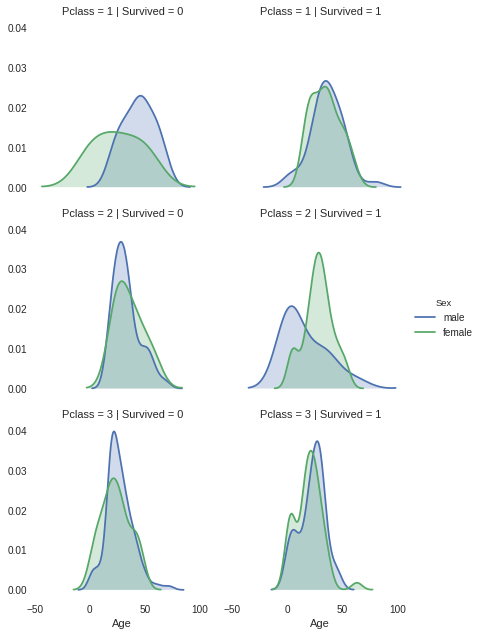

In [10]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True )
g.add_legend()
sns.despine(left=True, bottom=True)
plt.show()

# 10: Next Steps

In this mission, we learned how the seaborn library lets us quickly style plots and create small multiples using conditions we specify. In the next mission, we'll explore how to visualize geographic data using matplotlib.